<a href="https://colab.research.google.com/github/britssc/ecuadorian_fake_news_detection/blob/main/Taller_de_la_comunicaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # to change the style
import numpy as np
import os

## 1. Reading the data set

In [ ]:
import pandas as pd

data = pd.read_excel('Datos.xlsx')

data

,text,real
0,#URGENTE 🔴 EL PUEBLO SE LEVANTO EN #QUITO TRAS...,0
1,¡Veedores de lejitos no más!\nPor disposición ...,0
2,#DefiendeTuVoto\n#EICNEqueTenemos\nDENUNCIA\nL...,0
3,Según el articulo 127 del Código de la Democra...,0
4,Me cuentan que en Carondelet supuestamente tie...,0
...,...,...
617,Un comparativo desde 2017 hasta los resultados...,1
618,"La organización indígena Conaie, liderada por ...",1
619,Inteligencia militar emitió 10 alertas de inte...,1
620,El Pleno del CNE negó la mañana de este jueves...,1


## 2. Visualization of the data set

In [ ]:
# Tweets of each type found in the training dataset.
data['real'].value_counts()

,count
real,
1,323
0,299


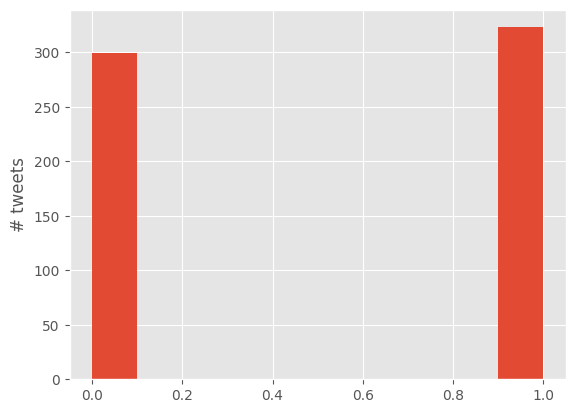

In [ ]:
data['real'].hist()
plt.ylabel("# tweets")
plt.show()

Always perform an exploratory analysis of the data distribution to determine the best way to solve the problem.

### Number of words per Tweet

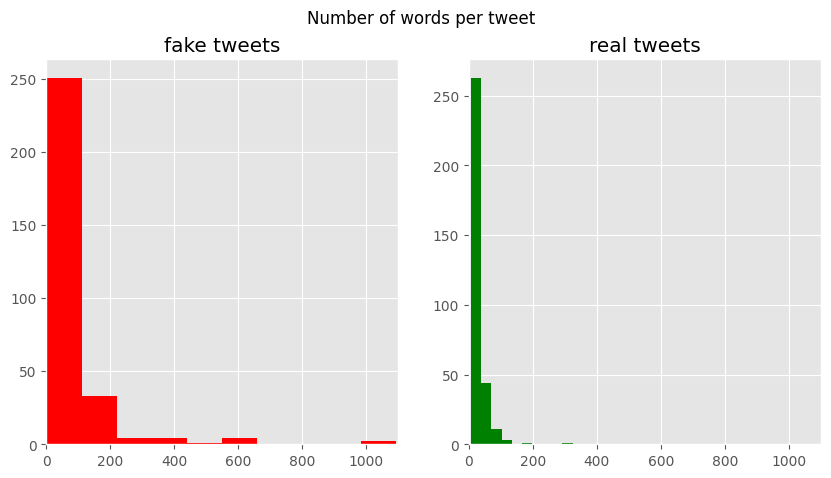

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# We calculate the number of words
tweet_len_0 = data[data['real'] == 0]['text'].str.split().map(lambda x: len(x))
tweet_len_1 = data[data['real'] == 1]['text'].str.split().map(lambda x: len(x))

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake tweets')
ax1.set_xlim([0,1100])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real tweets')
ax2.set_xlim([0,1100])

fig.suptitle('Number of words per tweet')

plt.show()

### Number of unique words per Tweet

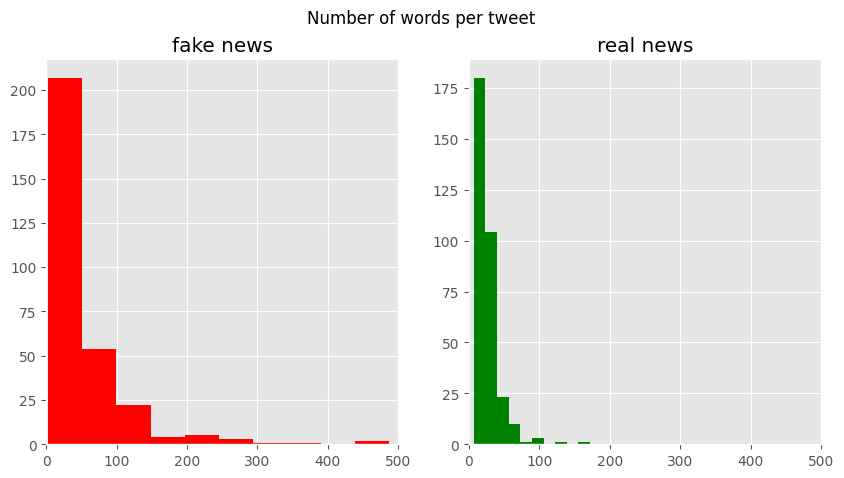

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# We calculate the number of words
tweet_len_0 = data[data['real'] == 0]['text'].str.split().map(lambda x: len(set(x)))
tweet_len_1 = data[data['real'] == 1]['text'].str.split().map(lambda x: len(set(x)))

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake news')
ax1.set_xlim([0,500])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real news')
ax2.set_xlim([0,500])

fig.suptitle('Number of words per tweet')

plt.show()

### Average word length per Tweet

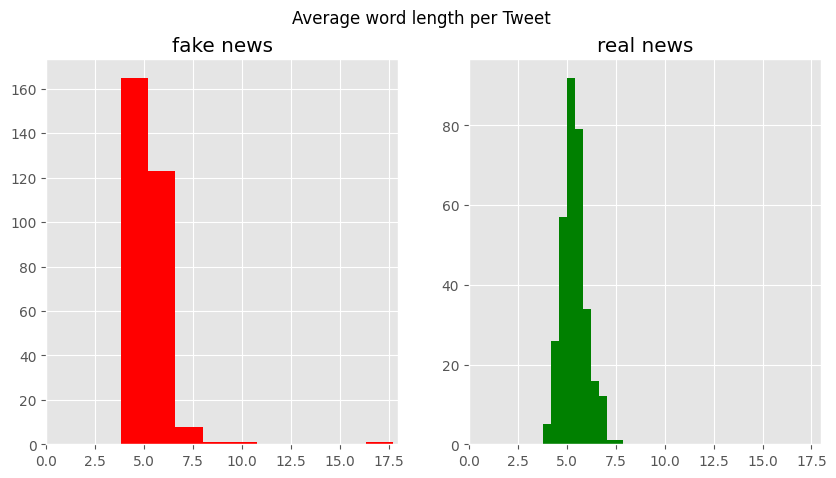

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# We calculate the number of words
tweet_len_0 = data[data['real'] == 0]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))
tweet_len_1 = data[data['real'] == 1]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake news')
ax1.set_xlim([0,18])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real news')
ax2.set_xlim([0,18])

fig.suptitle('Average word length per Tweet')

plt.show()

### Number of characters per tweet

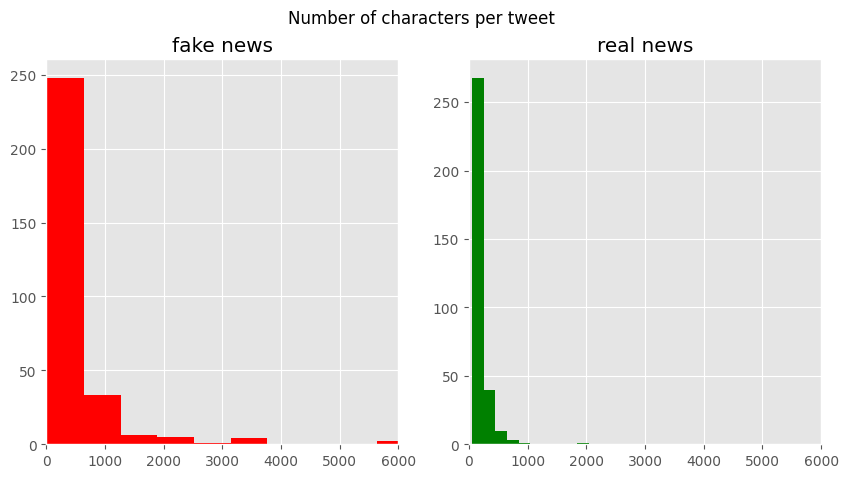

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de caracteres por tweet
tweet_len_0 = data[data['real'] == 0]['text'].str.len()
tweet_len_1 = data[data['real'] == 1]['text'].str.len()

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake news')
ax1.set_xlim([0,6000])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real news')
ax2.set_xlim([0,6000])

fig.suptitle('Number of characters per tweet')

plt.show()

We could continue to calculate input characteristics such as the following:
* Number of end words per Tweet
* Number of urls per Tweet
* Average number of characters per Tweet
* Number of characters per Tweet
* Number of punctuation marks per Tweet
* Number of hashtags per Tweet
* Number of @'s per tweet

### Most used stopwords

These words do not have a meaning by themselves, but modify or accompany others, this group usually consists of articles, pronouns, prepositions, adverbs and even some verbs.

In natural language data processing they are filtered before or after the process itself, they are not considered because they have no meaning, in the case of search engines such as Google they are not considered at the time of positioning, but they are considered at the time of displaying search results.

In [ ]:
from nltk.corpus import stopwords
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
def plot_stopwords(label):
    tweets_stopwords = {}
    for words in data[data['real'] == label]['text'].str.split():
        sw = list(set(words).intersection(stopwords.words('spanish')))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    plt.bar(*zip(*top))
    plt.show()

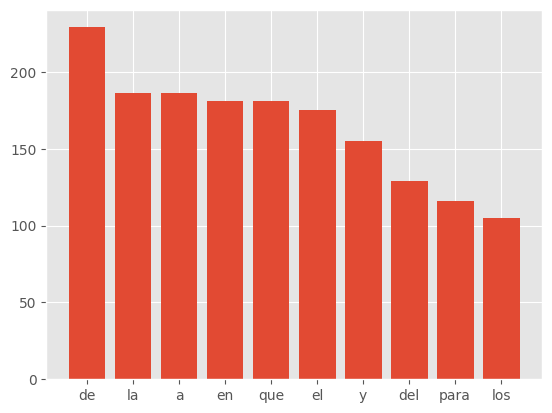

In [ ]:
#Fake news.
plot_stopwords(0)

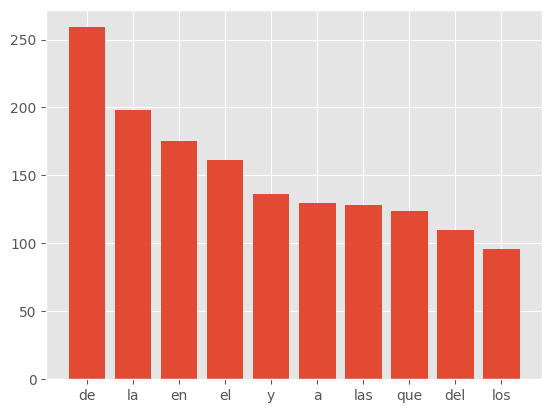

In [ ]:
# real words
plot_stopwords(1)

### Punctuation analysis

In [ ]:
import string

def plot_punctuation(label):
    tweets_stopwords = {}
    for words in data[data['real'] == label]['text'].str.split():
        sw = list(set(words).intersection(string.punctuation))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:20]
    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*top))
    plt.show()

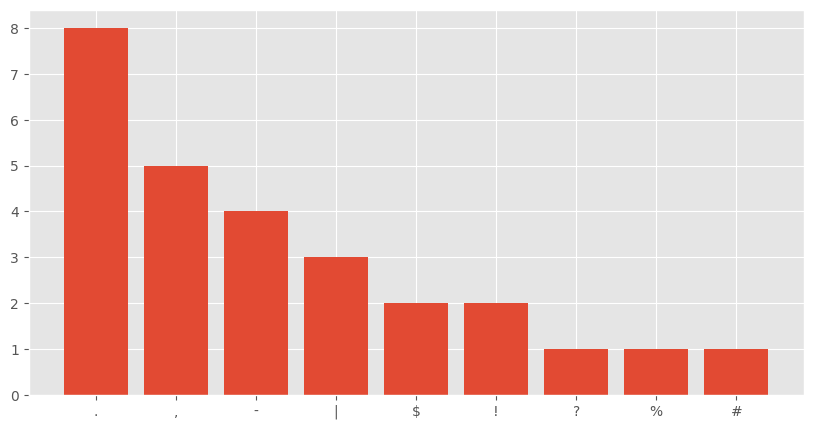

In [ ]:
#fake news
plot_punctuation(0)

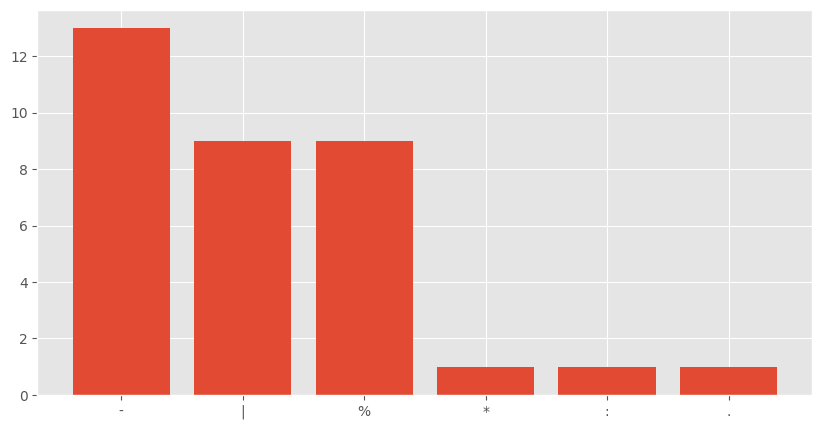

In [ ]:
# real news
plot_punctuation(1)

### Ngram analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(data['text']).sum(axis=0)

# We calculate
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

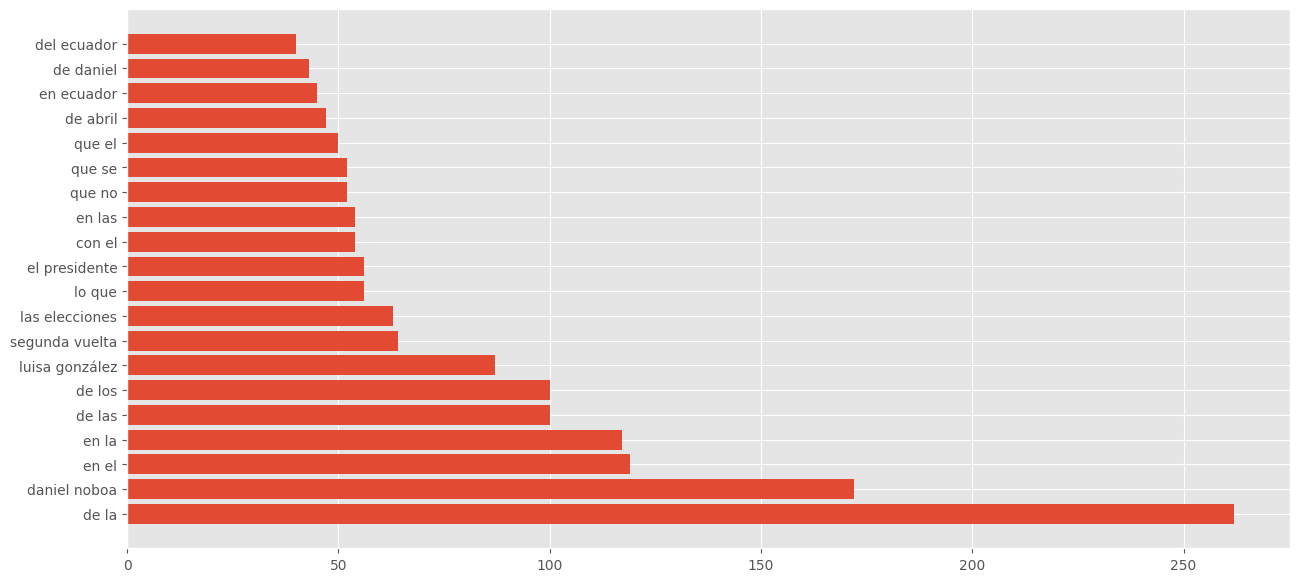

In [ ]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

## 3. Data set cleaning

In [ ]:
import re # to define regular expressions

In [ ]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [ ]:
remove_url("Esto es una prueba: http://localhost:8888/notebooks/Desktop/Workspace/Deep%20Neural%20Networks%20Course/11.%20Consideraciones%20de%20un%20proyecto%20de%20Deep%20Learning/code/Disaster%20Tweets.ipynb")

'Esto es una prueba: '

In [ ]:
from html.parser import HTMLParser

class HTMLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.fed = []

    def handle_data(self, d):
        self.fed.append(d)

    def get_data(self):
        return ''.join(self.fed)

def remove_html(text):
    s = HTMLStripper()
    s.feed(text)
    return s.get_data()

In [ ]:
remove_html('<tr><td align="left"><a href="../../issues/51/16.html#article">Phrack World News</a></td>')

'Phrack World News'

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [ ]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
remove_punctuation("hello # how are you")

'hello  how are you'

In [ ]:
# We apply our dataset cleaning functions
data_prep = data.copy()

data_prep['text'] = data['text'].apply(remove_url)
data_prep['text'] = data_prep['text'].apply(remove_html)
data_prep['text'] = data_prep['text'].apply(remove_emoji)
data_prep['text'] = data_prep['text'].apply(remove_punctuation)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(data_prep['text']).sum(axis=0)

# We calculate
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

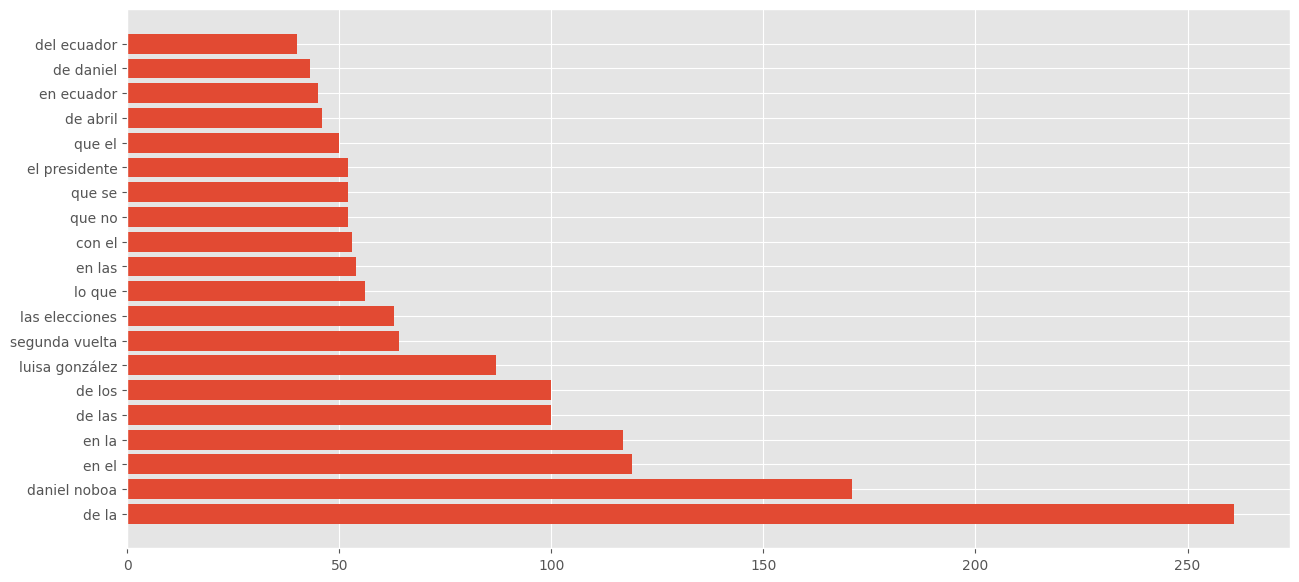

In [ ]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

## 4. Vectorization of the data set

In [ ]:
y = data_prep['real']
X = data_prep['text']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.30)
X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #based in frequencies

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [ ]:
X_train = X_train.toarray()
X_val = X_val.toarray()
X_test = X_test.toarray()

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print("Length of training subset: ", len(X_train))
print("Length of validation subset: ", len(X_val))


Length of training subset:  435
Length of validation subset:  93


In [ ]:
X_train.shape

(435, 4855)

# OPTION 1: Neural Network

## 6. Model construction

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:

history = model.fit(
    X_train,
    Y_train,
    epochs=10,
    batch_size=100,
    validation_data=(X_val, Y_val))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.4823 - loss: 0.6932 - val_accuracy: 0.5806 - val_loss: 0.6906
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8165 - loss: 0.6829 - val_accuracy: 0.5591 - val_loss: 0.6857
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8628 - loss: 0.6696 - val_accuracy: 0.5914 - val_loss: 0.6783
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8926 - loss: 0.6506 - val_accuracy: 0.6452 - val_loss: 0.6668
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9456 - loss: 0.6243 - val_accuracy: 0.7204 - val_loss: 0.6517
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9626 - loss: 0.5908 - val_accuracy: 0.7527 - val_loss: 0.6338
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9783 - loss: 0.5508 - val_accuracy: 0.7742 - val_loss: 0.6133
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9821 - loss: 0.5051 - val_accuracy: 0.8065 - val_loss: 0.5902


In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7739 - loss: 0.5697
Test Accuracy: 0.7979


## 7. Model evaluation

In [ ]:
#X_test_val = vectorizer.transform(X_test)

#X_test_val = X_test_val.toarray()

#Y_pred = model.predict(X_test_val).round(0)

In [ ]:
#for i in range(30):
#    print("{} - {}".format(X_test.iloc[i], Y_pred[i]))

# OPCION 2: REGRESIÓN LOGÍSTICA

In [ ]:
# Importaciones adicionales necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import torch

# Configuración de dispositivo (GPU si está disponible)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Modelo tradicional de Machine Learning
print("\nEntrenando modelo de Regresión Logística...")
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, Y_train)

# Evaluación
logreg_val_pred = logreg_model.predict(X_val)
print("\nResultados de Regresión Logística (Validation Set):")
print(classification_report(Y_val, logreg_val_pred))

logreg_test_pred = logreg_model.predict(X_test)
print("\nResultados de Regresión Logística (Test Set):")
print(classification_report(Y_test, logreg_test_pred))


Entrenando modelo de Regresión Logística...

Resultados de Regresión Logística (Validation Set):
              precision    recall  f1-score   support

           0       0.73      0.87      0.80        38
           1       0.90      0.78      0.83        55

    accuracy                           0.82        93
   macro avg       0.81      0.83      0.82        93
weighted avg       0.83      0.82      0.82        93


Resultados de Regresión Logística (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.84      0.83      0.83        52

    accuracy                           0.82        94
   macro avg       0.82      0.82      0.82        94
weighted avg       0.82      0.82      0.82        94



# OPCIÓN 3: LLM

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# MarIA

In [ ]:
import torch
import numpy as np
from transformers import RobertaForSequenceClassification, RobertaTokenizer, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Configuración del dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# División de datos
X_train_Maria, X_temp_Maria, y_train_Maria, y_temp_Maria = train_test_split(X, y, test_size=0.3, random_state=42)
X_val_Maria, X_test_Maria, y_val_Maria, y_test_Maria = train_test_split(X_temp_Maria, y_temp_Maria, test_size=0.5, random_state=42)

# Tokenizador
tokenizer_Maria = RobertaTokenizer.from_pretrained("BSC-TeMU/roberta-base-bne")

def tokenize_function_Maria(examples):
    return tokenizer_Maria(examples["text"], padding="max_length", truncation=True, max_length=128)

# Creación de datasets
train_dataset_Maria = Dataset.from_dict({"text": X_train_Maria, "label": y_train_Maria})
val_dataset_Maria = Dataset.from_dict({"text": X_val_Maria, "label": y_val_Maria})
test_dataset_Maria = Dataset.from_dict({"text": X_test_Maria, "label": y_test_Maria})

# Tokenización
train_dataset_Maria = train_dataset_Maria.map(tokenize_function_Maria, batched=True)
val_dataset_Maria = val_dataset_Maria.map(tokenize_function_Maria, batched=True)
test_dataset_Maria = test_dataset_Maria.map(tokenize_function_Maria, batched=True)

# Modelo
model_maria = RobertaForSequenceClassification.from_pretrained(
    "BSC-TeMU/roberta-base-bne",
    num_labels=2
).to(device)

# Función para calcular métricas
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
        'f1': f1_score(labels, predictions),
        'precision': precision_score(labels, predictions),
        'recall': recall_score(labels, predictions),
    }

# Argumentos de entrenamiento
training_args_Maria = TrainingArguments(
    output_dir='./results_model_maria',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs_model_maria',
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model='f1',  # Ahora esta métrica está disponible
    greater_is_better=True,
    report_to="none",
    save_total_limit=1
)

# Trainer
trainer_Maria = Trainer(
    model=model_maria,
    args=training_args_Maria,
    train_dataset=train_dataset_Maria,
    eval_dataset=val_dataset_Maria,
    compute_metrics=compute_metrics  # ¡Función de métricas añadida!
)

# Entrenamiento
print("\nEntrenando modelo_maria...")
trainer_Maria.train()

# Evaluación
print("\nEvaluando en conjunto de test...")
test_predictions_Maria = trainer_Maria.predict(test_dataset_Maria)
logits_Maria = test_predictions_Maria.predictions
labels_Maria = test_predictions_Maria.label_ids

predictions_Maria = np.argmax(logits_Maria, axis=-1)

# Cálculo de métricas
accuracy_model_maria = accuracy_score(labels_Maria, predictions_Maria)
precision_model_maria = precision_score(labels_Maria, predictions_Maria)
recall_model_maria = recall_score(labels_Maria, predictions_Maria)
f1_model_maria = f1_score(labels_Maria, predictions_Maria)
probs_Maria = torch.softmax(torch.tensor(logits_Maria), dim=1).numpy()
auc_model_maria = roc_auc_score(labels_Maria, probs_Maria[:, 1])

print("\nResultados finales de model_maria en test:")
print(f"Accuracy: {accuracy_model_maria:.4f}")
print(f"Precision: {precision_model_maria:.4f}")
print(f"Recall: {recall_model_maria:.4f}")
print(f"F1-score: {f1_model_maria:.4f}")
print(f"AUC: {auc_model_maria:.4f}")

model_maria.save_pretrained('./modelo_maria_fake_news')
tokenizer_Maria.save_pretrained('./modelo_maria_fake_news')

print("\nVariables con las métricas:")
print(f"accuracy_model_maria = {accuracy_model_maria}")
print(f"precision_model_maria = {precision_model_maria}")
print(f"recall_model_maria = {recall_model_maria}")
print(f"f1_model_maria = {f1_model_maria}")
print(f"auc_model_maria = {auc_model_maria}")

Map:   0%|          | 0/435 [00:00<?, ? examples/s]

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

Map:   0%|          | 0/94 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at BSC-TeMU/roberta-base-bne and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Entrenando modelo_maria...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.662619,0.698925,0.688889,0.837838,0.584906
2,No log,0.604992,0.752688,0.776699,0.800000,0.754717
3,No log,0.637271,0.763441,0.796296,0.781818,0.811321



Evaluando en conjunto de test...



Resultados finales de model_maria en test:
Accuracy: 0.7872
Precision: 0.8542
Recall: 0.7593
F1-score: 0.8039
AUC: 0.8722

Variables con las métricas:
accuracy_model_maria = 0.7872340425531915
precision_model_maria = 0.8541666666666666
recall_model_maria = 0.7592592592592593
f1_model_maria = 0.803921568627451
auc_model_maria = 0.8722222222222222


# BERTuit

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import torch

# Cargar tokenizer y modelo
tokenizer_Bertuit = AutoTokenizer.from_pretrained("AIDA-UPM/BERTuit-base")
model_Bertuit = AutoModelForSequenceClassification.from_pretrained("AIDA-UPM/BERTuit-base", num_labels=2)

# Tokenización del texto
def tokenize_function(example):
    return tokenizer_Bertuit(example['text'], padding="max_length", truncation=True)

# Tokenizar datasets
train_dataset_Bertuit = dataset_train.map(tokenize_function, batched=True)
val_dataset_Bertuit = dataset_val.map(tokenize_function, batched=True)
test_dataset_Bertuit = dataset_test.map(tokenize_function, batched=True)

# Establecer formato
train_dataset_Bertuit.set_format("torch", columns=["input_ids", "attention_mask", "label"])
val_dataset_Bertuit.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset_Bertuit.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Argumentos del entrenamiento
training_args_Bertuit = TrainingArguments(
    output_dir="./results_bertuit",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs_bertuit',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
)

# Crear Trainer sin compute_metrics
trainer_Bertuit = Trainer(
    model=model_Bertuit,
    args=training_args_Bertuit,
    train_dataset=train_dataset_Bertuit,
    eval_dataset=val_dataset_Bertuit,
)

# Entrenar el modelo
trainer_Bertuit.train()

# Evaluar en test
print("\nEvaluando en conjunto de test...")
test_predictions_Bertuit = trainer_Bertuit.predict(test_dataset_Bertuit)
logits_Bertuit = test_predictions_Bertuit.predictions
labels_Bertuit = test_predictions_Bertuit.label_ids

predictions_Bertuit = np.argmax(logits_Bertuit, axis=-1)

accuracy_model_bertuit = accuracy_score(labels_Bertuit, predictions_Bertuit)
precision_model_bertuit = precision_score(labels_Bertuit, predictions_Bertuit)
recall_model_bertuit = recall_score(labels_Bertuit, predictions_Bertuit)
f1_model_bertuit = f1_score(labels_Bertuit, predictions_Bertuit)

probs_Bertuit = torch.softmax(torch.tensor(logits_Bertuit), dim=1).numpy()
auc_model_bertuit = roc_auc_score(labels_Bertuit, probs_Bertuit[:, 1])

# Mostrar resultados
print("\nResultados finales de model_bertuit en test:")
print(f"Accuracy: {accuracy_model_bertuit:.4f}")
print(f"Precision: {precision_model_bertuit:.4f}")
print(f"Recall: {recall_model_bertuit:.4f}")
print(f"F1-score: {f1_model_bertuit:.4f}")
print(f"AUC: {auc_model_bertuit:.4f}")

# Guardar modelo y tokenizer
model_Bertuit.save_pretrained('./modelo_bertuit_fake_news')
tokenizer_Bertuit.save_pretrained('./modelo_bertuit_fake_news')

# Mostrar variables finales
print("\nVariables con las métricas:")
print(f"accuracy_model_bertuit = {accuracy_model_bertuit}")
print(f"precision_model_bertuit = {precision_model_bertuit}")
print(f"recall_model_bertuit = {recall_model_bertuit}")
print(f"f1_model_bertuit = {f1_model_bertuit}")
print(f"auc_model_bertuit = {auc_model_bertuit}")


tokenizer_config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/483k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/283k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/821 [00:00<?, ?B/s]

OSError: AIDA-UPM/BERTuit-base does not appear to have a file named pytorch_model.bin but there is a file for TensorFlow weights. Use `from_tf=True` to load this model from those weights.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Modelo neuronal mejorado
print("\nEntrenando modelo de Red Neuronal mejorada...")
improved_nn = models.Sequential()
improved_nn.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
improved_nn.add(layers.Dropout(0.5))
improved_nn.add(layers.Dense(64, activation='relu'))
improved_nn.add(layers.Dropout(0.3))
improved_nn.add(layers.Dense(1, activation='sigmoid'))

improved_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history_improved = improved_nn.fit(
    X_train,
    Y_train,
    epochs=30,
    batch_size=512,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping]
)

# Evaluación
nn_test_pred = (improved_nn.predict(X_test_val) > 0.5).astype("int32")
print("\nResultados de Red Neuronal Mejorada (Test Set):")
print(classification_report(Y_test, nn_test_pred))


Entrenando modelo de Red Neuronal mejorada...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - Precision: 0.5576 - Recall: 0.4259 - accuracy: 0.5471 - loss: 0.6924 - val_Precision: 0.7586 - val_Recall: 0.4000 - val_accuracy: 0.5699 - val_loss: 0.6912
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - Precision: 0.6288 - Recall: 0.3843 - accuracy: 0.5816 - loss: 0.6901 - val_Precision: 0.8333 - val_Recall: 0.3636 - val_accuracy: 0.5806 - val_loss: 0.6901
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - Precision: 0.7909 - Recall: 0.4028 - accuracy: 0.6506 - loss: 0.6860 - val_Precision: 0.8800 - val_Recall: 0.4000 - val_accuracy: 0.6129 - val_loss: 0.6885
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - Precision: 0.9225 - Recall: 0.5509 - accuracy: 0.7540 - loss: 0.6820 - val_Precision: 0.9200 - val_Recall: 0.4182 - val_accuracy: 0.6344 - val_loss: 0.6866
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - Precision: 0.9470 - Recall: 0.5787 - accuracy: 0.7747 - loss: 0.6768 - val_Precision: 0.9259 - val_Recall: 0.4545 - val

NameError: name 'X_test_val' is not defined

In [ ]:
# Función para mostrar comparativa de métricas
def compare_models(models_results):
    comparison_df = pd.DataFrame(models_results)
    print("\nComparativa de modelos:")
    print(comparison_df)

    # Gráfico de comparación
    comparison_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
    plt.title('Comparación de Modelos por Métrica')
    plt.ylabel('Puntuación')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Recolectar resultados (ejemplo, necesitarías adaptar esto con tus resultados reales)
models_results = [
    {'Model': 'Red Neuronal', 'Accuracy': 0.85, 'Precision': 0.86, 'Recall': 0.83},
    {'Model': 'Logistic Regression', 'Accuracy': 0.82, 'Precision': 0.84, 'Recall': 0.80},
    # Agregar aquí los resultados de los otros modelos
]

compare_models(models_results)